## Predicción del consumo de gasolina usando TensorFlow

### Importar librerías

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from sklearn.metrics import mean_squared_error, accuracy_score
from math import sqrt
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

### Descargar el conjunto de datos

In [5]:
data = pd.read_csv('petrol_consumption.csv')

### Exploración de los datos

In [6]:
data.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [7]:
# Obtenga el tamaño del dataset (número de ejemplos y número de características) con la función shape
data.shape
# Visualice el DataFrame con la función head(), tail() o sample()
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [8]:
# Características
X = data.iloc[:, 0:4]
X.shape

(48, 4)

In [9]:
# Objetivo
y = data.Petrol_Consumption
y.shape

(48,)

In [10]:
# Separe el conjunto de datos en entrenamiento y prueba  (relación: 80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
print('Tamaño del conjunto de datos de entrenamiento: ', X_train.shape)
print('Tamaño del conjunto de datos de prueba: ', X_test.shape)

Tamaño del conjunto de datos de entrenamiento:  (38, 4)
Tamaño del conjunto de datos de prueba:  (10, 4)


### Preprocesamiento de los datos

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Definición del modelo

In [107]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse' , optimizer='adam', metrics=["mean_squared_error"])

In [108]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

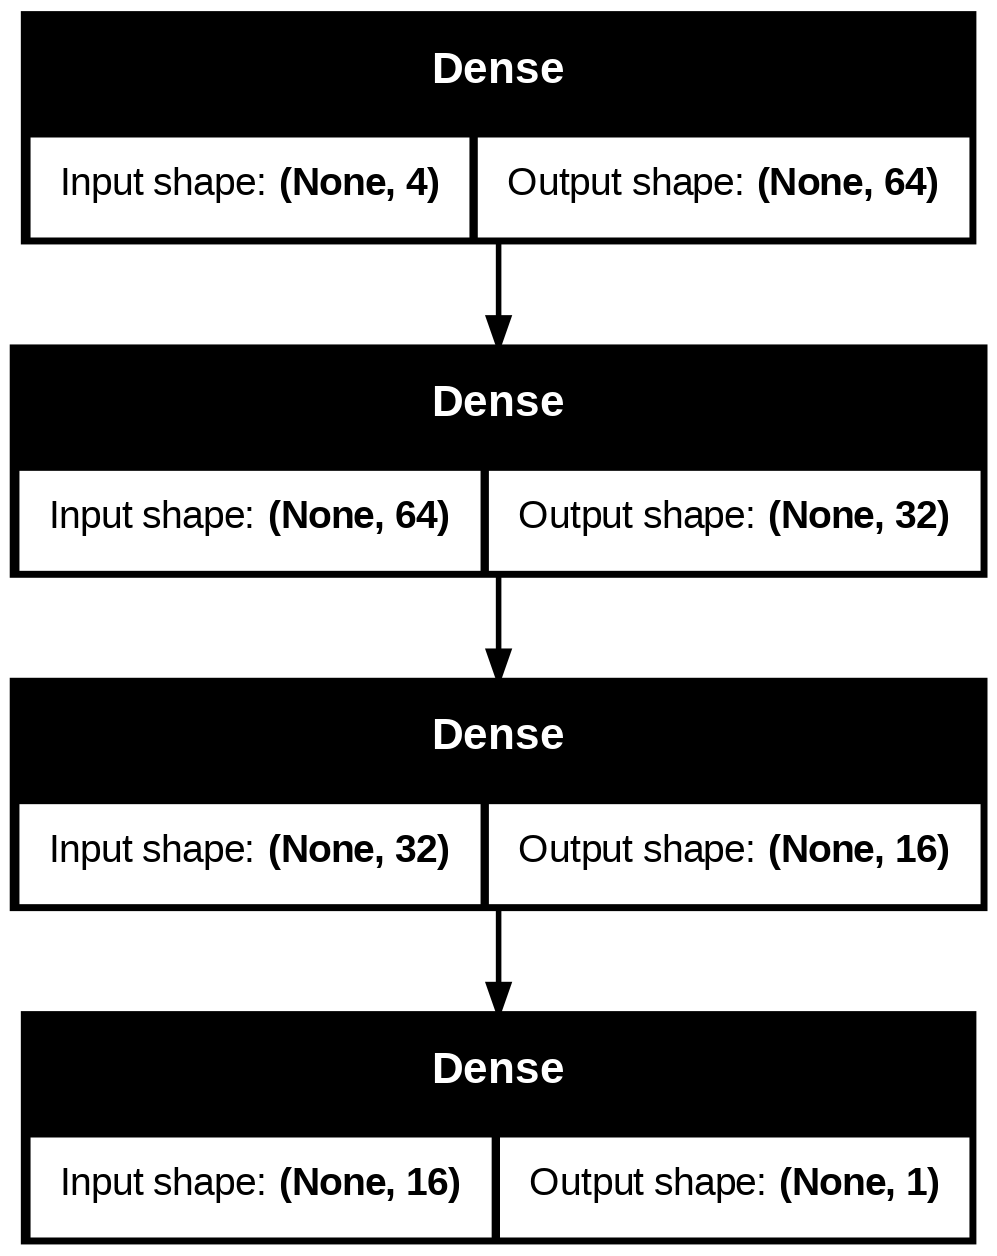

In [118]:
plot_model(model, show_shapes=True)

### Entrenamiento del modelo

In [119]:
es = EarlyStopping(monitor='val_loss', patience=5,  mode='min',  verbose=1)

In [120]:
# Entrenamiento
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150,verbose=1, callbacks=[es])

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 16544.4004 - mean_squared_error: 16544.4004 - val_loss: 18812.2500 - val_mean_squared_error: 18812.2500
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 15642.5195 - mean_squared_error: 15642.5195 - val_loss: 18745.3809 - val_mean_squared_error: 18745.3809
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 15646.9639 - mean_squared_error: 15646.9639 - val_loss: 18691.1875 - val_mean_squared_error: 18691.1875
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 15851.6846 - mean_squared_error: 15851.6846 - val_loss: 18652.6348 - val_mean_squared_error: 18652.6348
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 14460.6592 - mean_squared_error: 14460.6592 - val_loss: 18642.6152 - val_mean_squared_error: 18642.6152
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 14537.1777 - mean_squared_error: 14537.1777 - val_loss: 18665.9727 - val_mean_squared_error: 18665.9727
Epoch 7/150
2/2 ━━━━━━━━━━━

### Evaluación del modelo

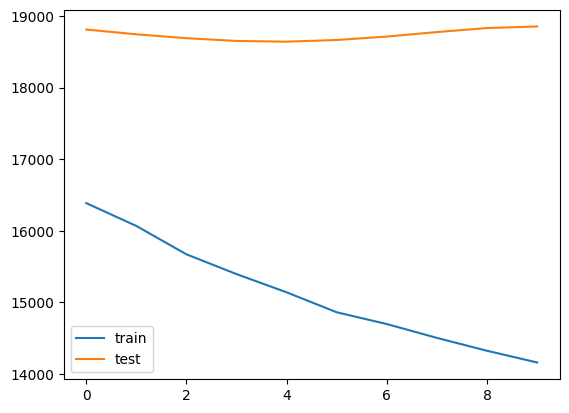

In [121]:
# Ploteando training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [122]:
# Error
y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_pred,y_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
137.3129270713278


In [123]:
y_pred.flatten()

array([628.93536, 508.88065, 608.332  , 555.5091 , 720.60223, 495.7023 ,
       664.27167, 547.73224, 469.3089 , 312.50314], dtype=float32)

In [124]:
y_test

,Petrol_Consumption
29,534
4,410
26,577
30,571
32,577
37,704
34,487
40,587
7,467
10,580


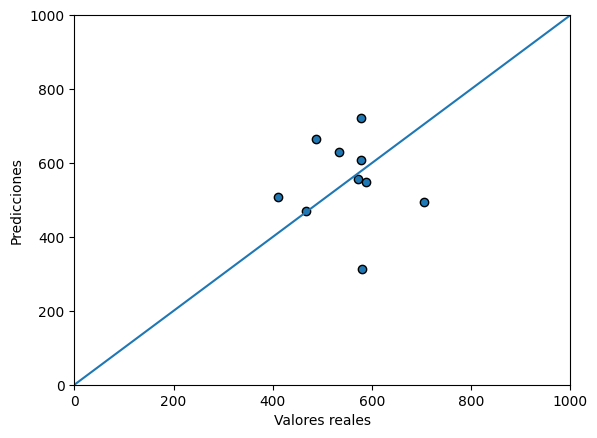

In [125]:
# Comparando predicciones vs valores reales
plt.scatter(y_test,y_pred, edgecolors=(0, 0, 0))
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

### Realizar una predicción

In [126]:
new_value = [8.0, 3448, 5399, 0.5]
# Escalar la nueva observación
new_value = sc.transform([new_value])
# Utilizar predict para predecir la nueva observación
prediction = model.predict(new_value)
print('Predicción: ', prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicción:  [[649.58374]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Activity

Modify the hyperparameters and/or architecture in order to improve the current results.